# Diabetes ML Prediction

**This projects builds classification machine learning models in Python for diabetes prediction using LogisticRegression, SVM, RandomForest classification algorithms.**   

**Besides, GridSearchCV was applied to find the best hyperparameters for the three models.**   

**Model performances are measured via confusion matrix, precision, recall, ROC AUC. This projects reached an accuracy of 90.3% in diabetes prediction.**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Diabetes-ML-Prediction" data-toc-modified-id="Diabetes-ML-Prediction-1">Diabetes ML Prediction</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2">Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3.1">Missing Values</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3.2">Correlation</a></span></li><li><span><a href="#Create-New-Features" data-toc-modified-id="Create-New-Features-3.3">Create New Features</a></span></li><li><span><a href="#Normalize-and-Split-train-test-data" data-toc-modified-id="Normalize-and-Split-train-test-data-3.4">Normalize and Split train-test data</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4">Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression-classifier-with-dimension-reduction-using-RFE" data-toc-modified-id="Logistic-regression-classifier-with-dimension-reduction-using-RFE-4.1.1">Logistic regression classifier with dimension reduction using RFE</a></span></li><li><span><a href="#Logistic-regression-classifier-with-hyperparameter-tuning-using-GridSearchCV" data-toc-modified-id="Logistic-regression-classifier-with-hyperparameter-tuning-using-GridSearchCV-4.1.2">Logistic regression classifier with hyperparameter tuning using GridSearchCV</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine---SVM" data-toc-modified-id="Support-Vector-Machine---SVM-4.2">Support Vector Machine - SVM</a></span><ul class="toc-item"><li><span><a href="#SVM-classifier-with-hyperparameter-tuning-using-GridSearchCV" data-toc-modified-id="SVM-classifier-with-hyperparameter-tuning-using-GridSearchCV-4.2.1">SVM classifier with hyperparameter tuning using GridSearchCV</a></span></li></ul></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.3">Random forest</a></span><ul class="toc-item"><li><span><a href="#Random-forest-classifer-with-hyperparameter-tuning-using-GridSearchCV" data-toc-modified-id="Random-forest-classifer-with-hyperparameter-tuning-using-GridSearchCV-4.3.1">Random forest classifer with hyperparameter tuning using GridSearchCV</a></span></li></ul></li></ul></li></ul></div>

References:  
https://www.kaggle.com/uciml/pima-indians-diabetes-database/kernels  
https://www.kaggle.com/minkewang/diabetes-prediction-with-classification-methods/data  
https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86  
https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906#3.-Replace-missing-values-and-EDA  

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# model selection
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                             plot_roc_curve,classification_report,
                             roc_auc_score, roc_curve,auc,
                             accuracy_score,confusion_matrix)

# Data Understanding

In [3]:
raw_data = pd.read_csv("diabetes.csv")
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data = raw_data.copy()

In [6]:
# Replace 0 with NaN.
# For 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', value of 0 doesn't make sense.
# So value of 0 means missing value.
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN
data.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN
data.loc[data["BMI"] == 0.0, "BMI"] = np.NAN

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
missing_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

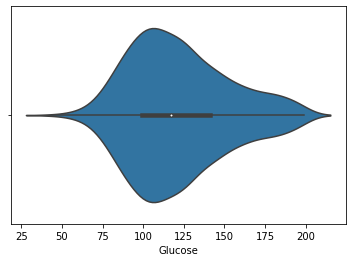

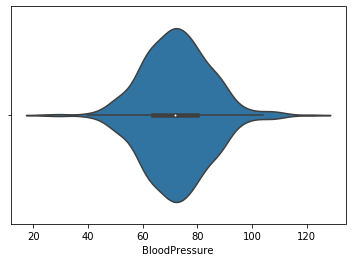

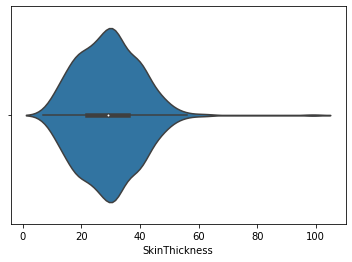

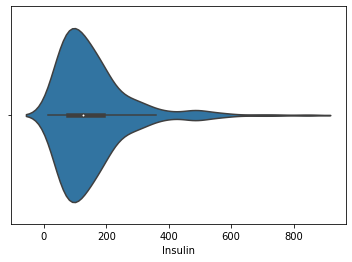

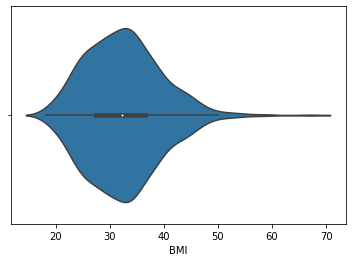

In [9]:
i = 1
for col in missing_value_columns:
    plt.figure(i)
    sns.violinplot(data[col])
    i=i+1

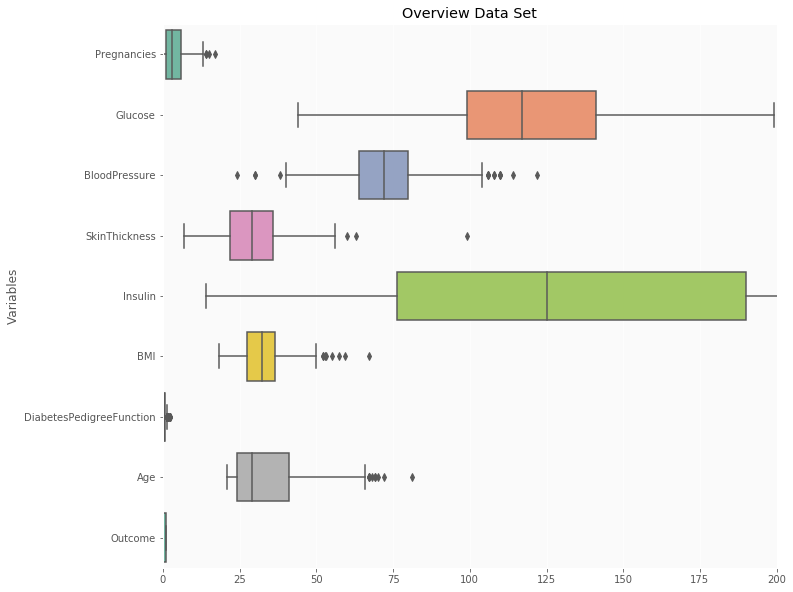

In [11]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

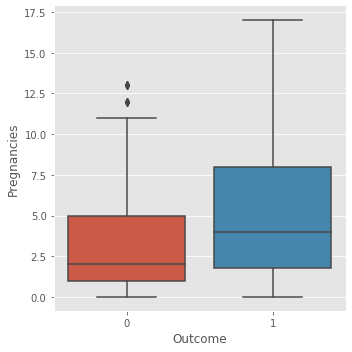

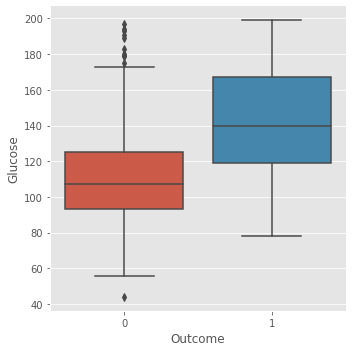

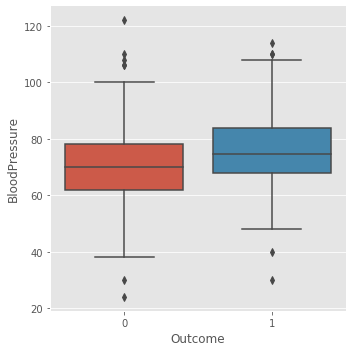

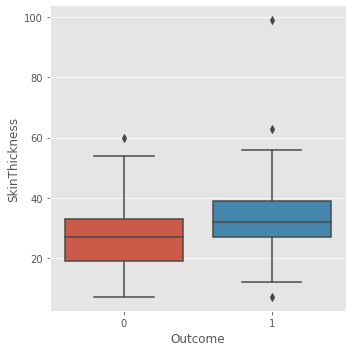

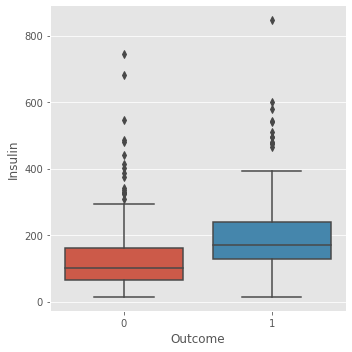

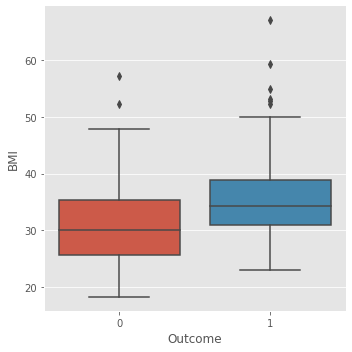

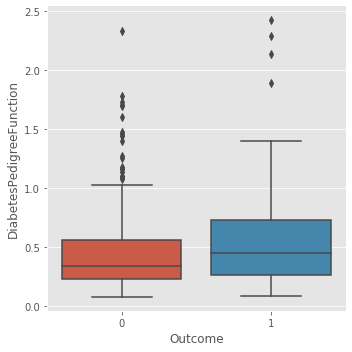

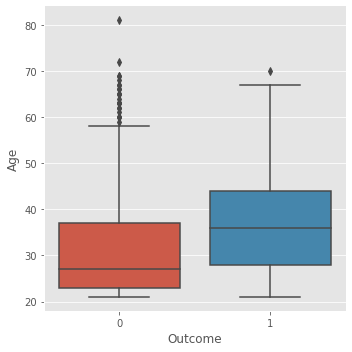

In [12]:
x_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for x in x_columns:
    sns.catplot(x = "Outcome", y = x, kind = "box", data = data)

**From the above EDA boxplots, I found that:**  
+ If the Glucose is lower than 120, it's very UNLIKELY to have diabetes.  
+ If the SkinThickness is lower than 20, it's very UNLIKELY to have diabetes.  
+ If the BMI is lower than 31, it's very UNLIKELY to have diabetes.  
+ If the Age is lower than 28, it's very UNLIKELY to have diabetes.  

# Data Preparation

## Missing Values

**By checking the distribution and outliers through visualizations above,  I decided to fill in MEAN for missing values in _Glucose_ and _BloodPressure_ , while others using MEDIAN.**

**For different outcomes, in other words, for healthy and diabetes patients, the fill-in values should be different. Therefore, I would fill in means and medians respectively for healthy people and patients.**

In [13]:
healthy = data.loc[data["Outcome"] == 0,].copy()
patients = data.loc[data["Outcome"] == 1,].copy()

In [14]:
healthy["Glucose"].fillna(healthy["Glucose"].mean(), inplace = True)
healthy["BloodPressure"].fillna(healthy["BloodPressure"].mean(), inplace = True)
healthy["SkinThickness"].fillna(healthy["SkinThickness"].median(), inplace = True)
healthy["Insulin"].fillna(healthy["Insulin"].median(), inplace = True)
healthy["BMI"].fillna(healthy["BMI"].median(), inplace = True)

patients["Glucose"].fillna(patients["Glucose"].mean(), inplace = True)
patients["BloodPressure"].fillna(patients["BloodPressure"].mean(), inplace = True)
patients["SkinThickness"].fillna(patients["SkinThickness"].median(), inplace = True)
patients["Insulin"].fillna(patients["Insulin"].median(), inplace = True)
patients["BMI"].fillna(patients["BMI"].median(), inplace = True)

In [15]:
# concat two subset dataframes and shuffle dataframe with reset indexes.
data = pd.concat([healthy, patients])

data = data.sample(frac=1).reset_index(drop=True)

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation

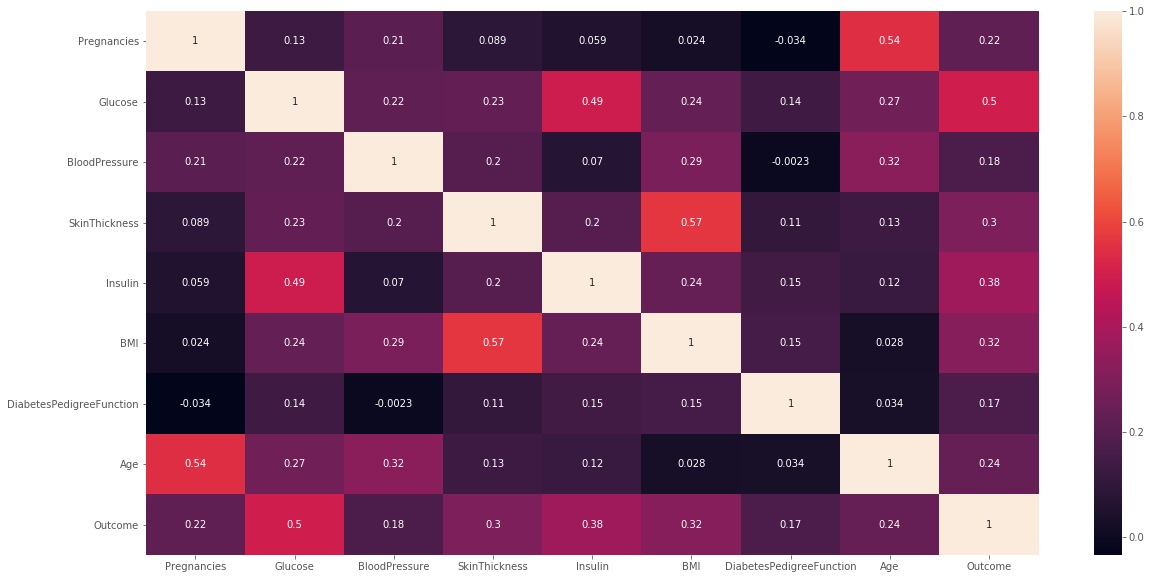

In [18]:
corr = data.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax=ax)

I found out that there are three strong correlations between the variables:  

+ Age and Pregnancies (correlation of 0.54).  
+ SkinThickness and BMI (correlation of 0.54).  
+ Glucose and Insulin (correlation of 0.42).  

**Examine the correlation of Age and Pregnancies:**

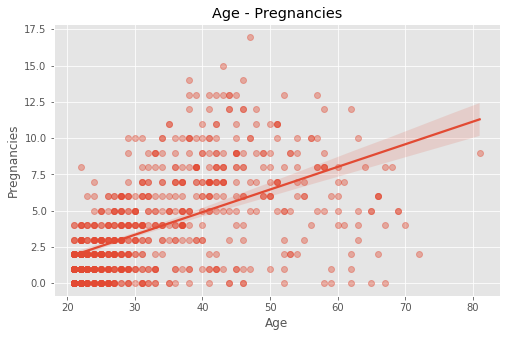

In [19]:
plt.figure(figsize=(8,5))
sns.regplot( x="Age", y="Pregnancies",data=data, scatter_kws={'alpha':0.4})
plt.title("Age - Pregnancies")
plt.show()

**Examine the correlation of SkinThickness and BMI:**

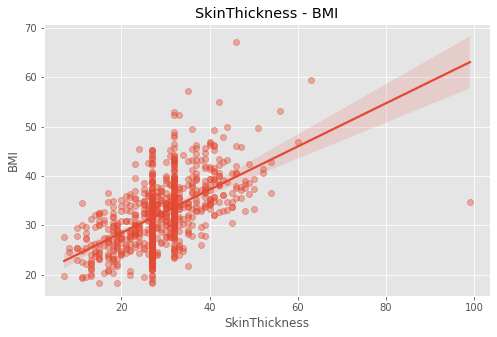

In [20]:
plt.figure(figsize=(8,5))
sns.regplot( x="SkinThickness", y="BMI",data=data, scatter_kws={'alpha':0.4})
plt.title("SkinThickness - BMI")
plt.show()

**Examine the correlation of Glucose and Insulin:**

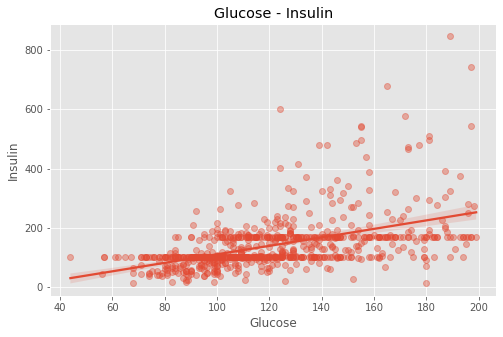

In [21]:
plt.figure(figsize=(8,5))
sns.regplot( x="Glucose", y="Insulin",data=data, scatter_kws={'alpha':0.4})
plt.title("Glucose - Insulin")
plt.show()

**From correlation analysis, the following variables may be excluded from the prediction model:**

+ Pregnancies: It's high correlated with age and low related with outcome (y).  
+ SkinThickness: It's high correlated with BMI and low related with outcome (y).  
+ Insulin: It's high correlated with Glucose and low related with outcome (y).  
+ BloodPressure: It's low related with outcome (y).  
+ DiabetesPedigreeFunction: It's low related with outcome (y).  

## Create New Features

**Based on the findings from previous EDA boxplots and correlation, I created following new features:**

+ L_Glucose: 1 if Glucose is lower than 120.  
+ L_SkinThickness: 1 if SkinThickness is lower than 20.  
+ L_BMI: 1 if BMI is lower than 31.  
+ L_Age: 1 if Age is lower than 28.  
+ BMI_Skin: BMI*SkinThickness.  
+ Pregnant_Age: Pregnancies/Age.

In [22]:
data.loc[:,'L_Glucose']=0
data.loc[data['Glucose']<120,'L_Glucose']=1

data.loc[:,'L_SkinThickness']=0
data.loc[data['SkinThickness']<20,'L_SkinThickness']=1

data.loc[:,'L_BMI']=0
data.loc[data['BMI']<31,'L_BMI']=1

data.loc[:,'L_Age']=0
data.loc[data['Age']<28,'L_Age']=1

data['BMI_Skin'] = data['BMI'] * data['SkinThickness']

data['Pregnant_Age'] =  data['Pregnancies'] / data['Age']

## Normalize and Split train-test data

In [23]:
# prepare x and y
y = data["Outcome"].values # array
x = data.drop(["Outcome"], axis = 1)

In [24]:
# normalize
x = (x - np.min(x)) / (np.max(x) - np.min(x))
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,L_Glucose,L_SkinThickness,L_BMI,L_Age,BMI_Skin,Pregnant_Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501273,0.494165,0.240107,0.153550,0.291097,0.168179,0.204015,0.528646,0.144531,0.444010,0.432292,0.233260,0.293712
std,0.198210,0.196529,0.123531,0.096639,0.107092,0.140705,0.141473,0.196004,0.499504,0.351857,0.497179,0.495717,0.125907,0.222001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.106370,0.190184,0.070773,0.050000,0.000000,0.000000,0.000000,0.000000,0.146290,0.113095
50%,0.176471,0.470968,0.489796,0.228261,0.106370,0.283231,0.125747,0.133333,1.000000,0.000000,0.000000,0.000000,0.218169,0.258503
75%,0.352941,0.625806,0.571429,0.271739,0.186899,0.376278,0.234095,0.333333,1.000000,0.000000,1.000000,1.000000,0.295569,0.452381
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# split training (0.8) and testing (0.2) data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (614, 14)
x_test:  (154, 14)
y_train:  (614,)
y_test:  (154,)


# Modeling

In [78]:
# define a function to select X best features.
def rfe(algorithm, best_feature_num, x_train, y_train, x_test, y_test):

    # return x best varibales using RFE
    rfe = RFE(algorithm, best_feature_num) 
    rfe = rfe.fit(x_train, y_train)
    
    columns = x_train.columns
    rfe_features = [columns[i] for i, x in enumerate(rfe.support_) if x]
    return rfe_features 

In [92]:
# define a function to run prediction model and return accuracy using X best features.
def predict(algorithm, rfe_features, x_train, y_train, x_test, y_test):
    
    # use selected x best features to fit model
    if rfe_features is not None:
        x_train = x_train[rfe_features]
        x_test = x_test[rfe_features]
    
    algorithm_fit = algorithm.fit(x_train, y_train)

    # predict 
    y_pred = algorithm.predict(x_test)
    
    # confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print('Confusion matrix :')
    print(confusion_mat)
    TP = confusion_mat[1, 1]
    TN = confusion_mat[0, 0]
    FP = confusion_mat[0, 1]
    FN = confusion_mat[1, 0]
    # plot confusion matrix 
    plot_confusion_matrix(algorithm_fit, x_test, y_test, cmap=plt.cm.Blues,display_labels=['No Diabetes','Diabetes'])
    plt.title('Confusion Matrix')
    
    # accuracy
    accuracy = algorithm.score(x_test, y_test)
    # print((TP+TN)/ (TN+TP+FP+FN))
    print('Accuracy : {:.3f}'.format(accuracy))
    
    # ROC_AUC score
    logit_roc_auc = roc_auc_score(y_test, algorithm.predict(x_test))
    print('ROC_AUC score : %0.2f' % logit_roc_auc)
    
    # Precision
    precision = TP/(TP+FP)
    print('Precision : %0.2f' % precision)
    
    # Recall
    recall = TP/(TP + FN)
    print('Recall : %0.2f' % recall)
    
    #return accuracy,confusion_mat,logit_roc_auc

## Logistic Regression

### Logistic regression classifier with dimension reduction using RFE

In this part, I used Logistic Regression for classification. Before doing this, I used Recursive Feature Elimination (RFE) for dimension reduction. 

I used the following metrics to measure performance. 

**Confusion matrix:** also known as the error matrix, allows visualization of the performance of an algorithm.

+ true positive (TP) : Diabetic correctly identified as diabetic.  
+ true negative (TN) : Healthy correctly identified as healthy.  
+ false positive (FP) : Healthy incorrectly identified as diabetic.  
+ false negative (FN) : Diabetic incorrectly identified as healthy.  


**Metrics:**

Accuracy : (TP +TN) / (TP + TN + FP +FN)  
Precision : TP / (TP + FP)  
Recall : TP / (TP + FN)  
F1 score : 2 x ((Precision x Recall) / (Precision + Recall))  
Roc Curve : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.  


**Precision Recall Curve:** shows the tradeoff between precision and recall for different threshold.

After examining, I found that when I chose the **following 11 features** from 14 features, it has the best performance:  
_'Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'L_Glucose', 'L_BMI', 'L_Age', 'BMI_Skin', 'Pregnant_Age'_

In [93]:
# define logistic regression
logreg = LogisticRegression()

Confusion matrix :
[[79  7]
 [18 50]]
Accuracy : 0.838
ROC_AUC score : 0.83
Precision : 0.88
Recall : 0.74


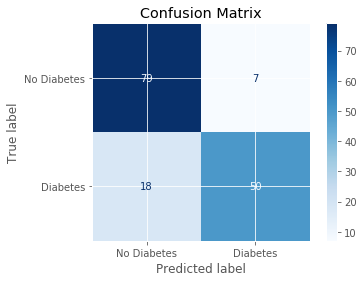

In [94]:
# Select 11 best features
rfe_11 = rfe(logreg, 11, x_train, y_train, x_test, y_test)

# Logistic regression prediction using 11 best features
predict(logreg, rfe_11, x_train, y_train, x_test, y_test)

### Logistic regression classifier with hyperparameter tuning using GridSearchCV

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


Confusion matrix :
[[78  8]
 [20 48]]
Accuracy : 0.818
ROC_AUC score : 0.81
Precision : 0.86
Recall : 0.71


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


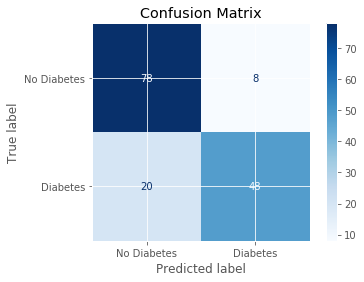

In [95]:
# Using all features
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=-1)

predict(logit, None, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Confusion matrix :
[[78  8]
 [18 50]]
Accuracy : 0.831
ROC_AUC score : 0.82
Precision : 0.86
Recall : 0.74


[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


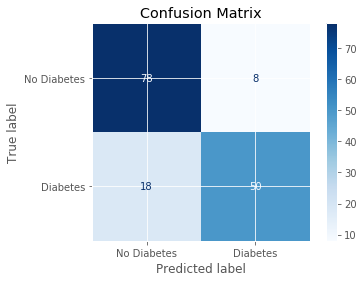

In [96]:
# Using 11 best features
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=-1)

predict(logit, rfe_11, x_train, y_train, x_test, y_test)

## Support Vector Machine - SVM

### SVM classifier with hyperparameter tuning using GridSearchCV

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.3s finished


Confusion matrix :
[[78  8]
 [18 50]]
Accuracy : 0.831
ROC_AUC score : 0.82
Precision : 0.86
Recall : 0.74


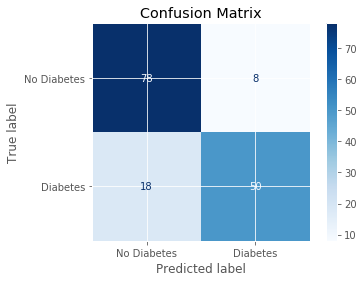

In [98]:
# usnig all features
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 5, verbose=True, n_jobs=-1)
predict(svc, None, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Confusion matrix :
[[76 10]
 [15 53]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


Accuracy : 0.838
ROC_AUC score : 0.83
Precision : 0.84
Recall : 0.78


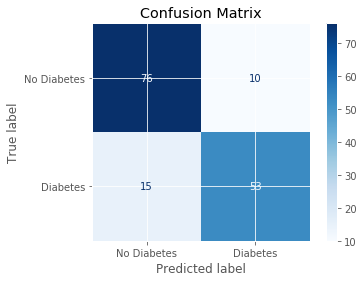

In [100]:
# usnig 11 best features
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 5, verbose=True, n_jobs=-1)
predict(svc, rfe_11, x_train, y_train, x_test, y_test)

## Random forest

### Random forest classifer with hyperparameter tuning using GridSearchCV

Some parameters to be adjusted:  
+ n_estimators = number of trees in the foreset  
+ max_features = max number of features considered for splitting a node  
+ max_depth = max number of levels in each decision tree / No. of Splits in Dtree  
+ min_samples_split = min number of data points placed in a node before the node is split  
+ min_samples_leaf = min number of data points allowed in a leaf node   
+ bootstrap = method for sampling data points (with or without replacement)  

In [102]:
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.0min finished


Confusion matrix :
[[81  5]
 [10 58]]
Accuracy : 0.903
ROC_AUC score : 0.90
Precision : 0.92
Recall : 0.85


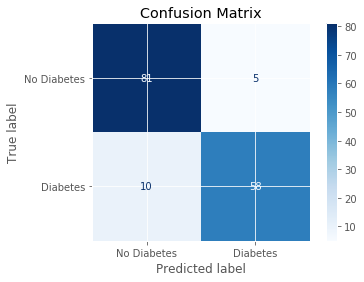

In [104]:
# usnig all features
rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 3, n_jobs = -1, verbose = 2)
predict(rf, None, x_train, y_train, x_test, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished


Confusion matrix :
[[81  5]
 [11 57]]
Accuracy : 0.896
ROC_AUC score : 0.89
Precision : 0.92
Recall : 0.84


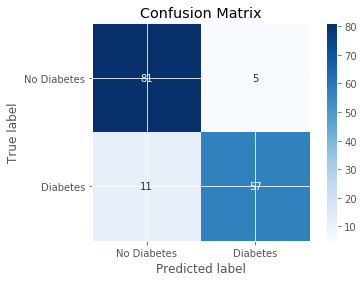

In [103]:
# usnig 11 best features
rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 3, n_jobs = -1, verbose = 2)
predict(rf, rfe_11, x_train, y_train, x_test, y_test)